In [25]:
pip install numpy

In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import pyodbc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model

from keras. layers import LSTM, Dense, Dropout
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model
from keras.optimizers import Adam


In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install Keras


Note: you may need to restart the kernel to use updated packages.


In [33]:
#get the view table from SQL
# Define the connection details
server = 'stocksserver.database.windows.net' 
database = 'stockdb' 
username = 'Evelyn'
password = 'Apple2327'

# Establish the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
query_price = "SELECT * FROM Daily_Price;"
# Execute the query and create a DataFrame
clean_df = pd.read_sql(query_price, conn)

conn.close()

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_28136\1807865550.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clean_df = pd.read_sql(query_price, conn)


In [34]:
clean_df

,Ticker,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume
0,AAL,2005-10-07,20.90,23.00,20.90,22.15,16350134
1,AAL,2005-10-14,22.28,22.40,21.40,22.27,9746113
2,AAL,2005-10-21,22.15,22.42,20.85,21.96,14218231
3,AAL,2005-10-28,22.01,23.90,21.70,23.90,9263807
4,AAL,2005-11-04,24.00,29.00,24.00,28.80,16788473
...,...,...,...,...,...,...,...
45681,XOM,2024-01-12,100.73,101.29,98.16,99.95,94947905
45682,XOM,2024-01-19,99.82,100.01,95.82,96.95,79648421
45683,XOM,2024-01-26,96.70,103.08,95.77,103.00,95840552
45684,XOM,2024-02-02,102.98,104.88,101.61,101.97,101557866


In [35]:
#check null values
print('Dataframe Shape: ', clean_df. shape)

missing_values = clean_df.isna().any().any()
missing_values 

Dataframe Shape:  (45686, 7)


False

In [36]:
selected_tickers = ['AAPL', 'ADBE', 'COST', 'JPM', 'NVDA']
selected_df = clean_df[clean_df['Ticker'].isin(selected_tickers)]

symbols_list = sorted(selected_df['Ticker'].unique())
symbols_list

['AAPL', 'ADBE', 'COST', 'JPM', 'NVDA']

In [37]:
#adjust datetime
import datetime

def str_to_datetime(s):
    split =s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])

    return datetime.datetime(year=year,month=month,day=day)


In [38]:
# Filter DataFrame for the desired symbol
AAPL_df = clean_df[clean_df['Ticker'] == 'AAPL']
AAPL_df

,Ticker,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume
957,AAPL,1999-11-12,87.75,97.73,86.75,90.62,25776200
958,AAPL,1999-11-19,89.62,94.75,88.06,92.44,13711000
959,AAPL,1999-11-26,91.75,95.50,88.50,95.06,9757600
960,AAPL,1999-12-03,94.25,115.56,93.25,115.00,28046300
961,AAPL,1999-12-10,114.56,118.00,99.00,103.00,25152800
...,...,...,...,...,...,...,...
2217,AAPL,2024-01-05,187.15,188.44,180.17,181.18,275083628
2218,AAPL,2024-01-12,182.09,187.05,181.50,185.92,238385377
2219,AAPL,2024-01-19,182.16,191.95,180.30,191.56,259829213
2220,AAPL,2024-01-26,192.30,196.38,191.94,192.42,255368848


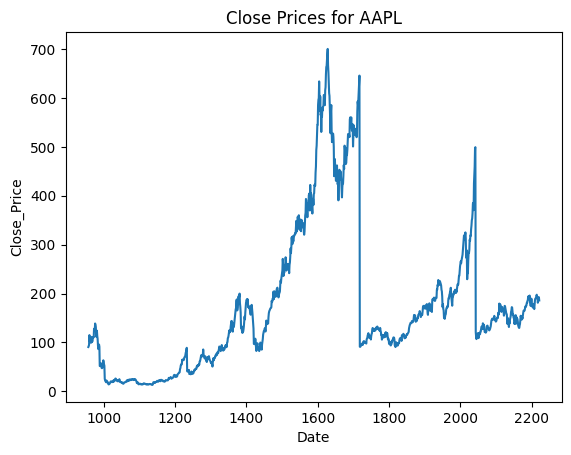

In [39]:

# Plot closing prices
AAPL_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for AAPL')
# Show plot
plt.show()

In [40]:
#Set Target Variable
AAPL_output = AAPL_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(AAPL_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=AAPL_df.index)
feature_transform.head()

,Open_Price,High_Price,Low_Price,Volume
957,0.108741,0.121630,0.108724,0.017455
958,0.111466,0.117320,0.110648,0.007061
959,0.114570,0.118405,0.111294,0.003655
960,0.118213,0.147417,0.118270,0.019410
961,0.147810,0.150946,0.126715,0.016918


In [41]:
 
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = AAPL_output[:len(train_index)].values.ravel(), AAPL_output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [42]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [43]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


In [44]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install graphviz 

In [46]:
pip install pydot-ng

Note: you may need to restart the kernel to use updated packages.


In [47]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 54596.9336
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 54257.1172
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 53582.3320
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 52435.9688
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 50724.5547
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 48476.8477
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 45768.3555
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 42741.2227
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 39550.1953
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 36320.6172
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 33147.7930
Epoch 12/100
144/144 [==============================

In [49]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

4/4 [==============================] - 0s 2ms/step


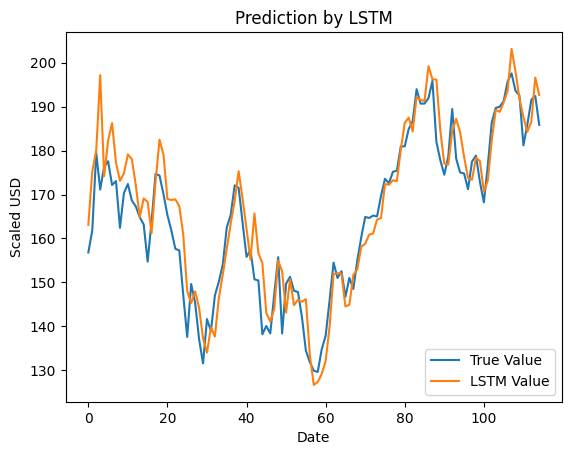

In [50]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 4.956797506581182
Mean Squared Error (MSE): 42.43890137853409
Root Mean Squared Error (RMSE): 6.5145146694542095
R-squared (R2) Score: 0.8659745267921739


c:\Users\Evelyn\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


For Loop for 5 stock in symbol list

In [52]:
clean_df

,Ticker,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume
0,AAL,2005-10-07,20.90,23.00,20.90,22.15,16350134
1,AAL,2005-10-14,22.28,22.40,21.40,22.27,9746113
2,AAL,2005-10-21,22.15,22.42,20.85,21.96,14218231
3,AAL,2005-10-28,22.01,23.90,21.70,23.90,9263807
4,AAL,2005-11-04,24.00,29.00,24.00,28.80,16788473
...,...,...,...,...,...,...,...
45681,XOM,2024-01-12,100.73,101.29,98.16,99.95,94947905
45682,XOM,2024-01-19,99.82,100.01,95.82,96.95,79648421
45683,XOM,2024-01-26,96.70,103.08,95.77,103.00,95840552
45684,XOM,2024-02-02,102.98,104.88,101.61,101.97,101557866


In [53]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from keras. layers import LSTM, Dense, Dropout
# from keras. models import Sequential
# from keras. layers import Dense
# import keras. backend as K
# from keras. callbacks import EarlyStopping
# from keras. models import load_model
# from keras. layers import LSTM
# from keras. utils.vis_utils import plot_model
# from keras.optimizers import Adam




# for symbol in symbols_list:
# # Filter data for the specific symbol
#     symbol_df = clean_df[clean_df['Ticker'] == symbol]
#     #Set Target Variable
#     symbol_output = symbol_df['Close_Price']
#     features = ['Open_Price','High_Price','Low_Price','Volume']
#     #Scaling
#     scaler = MinMaxScaler()
#     feature_transform = scaler.fit_transform(symbol_df[features])
#     feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=symbol_df.index)
#     feature_transform.head()

     
#     #Splitting to Training set and Test set
#     timesplit= TimeSeriesSplit(n_splits=8)
#     for train_index, test_index in timesplit.split(feature_transform):
#             X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
#             y_train, y_test = symbol_output[:len(train_index)].values.ravel(), symbol_output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

#     #Process the data for LSTM
#     trainX =np.array(X_train)
#     testX =np.array(X_test)
#     X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
#     X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#     #Building the LSTM Model
#     lstm = Sequential()
#     lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
#     lstm.add(Dense(1))
#     lstm.compile(loss='mean_squared_error', optimizer='adam')
#     plot_model(lstm, show_shapes=True, show_layer_names=True)

#     history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

#         #Predicted vs True Adj Close Value – LSTM
    
#     plt.plot(y_test, label='True Value')
#     plt.plot(y_pred, label='LSTM Value')
#     plt.title(f'Prediction by LSTM for {symbol}')
#     plt.xlabel('Date')
#     plt.ylabel('Scaled USD')
#     plt.legend()
#     plt.show()

#     # 1. Performance Evaluation
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     r2 = r2_score(y_test, y_pred)

#     print("Mean Absolute Error (MAE):", mae)
#     print("Mean Squared Error (MSE):", mse)
#     print("Root Mean Squared Error (RMSE):", rmse)
#     print("R-squared (R2) Score:", r2)
    



ADBE LSTM

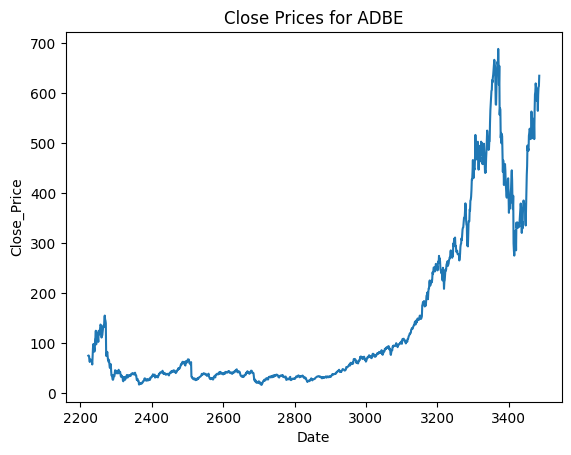

Epoch 1/100
144/144 [==============================] - 1s 2ms/step - loss: 30006.9082
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 29747.2480
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 29398.0625
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 28902.4531
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 28243.3145
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 27421.7637
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 26454.5234
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 25368.9766
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 24197.9375
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 22975.3477
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 21733.1445
Epoch 12/100
144/144 [==============================

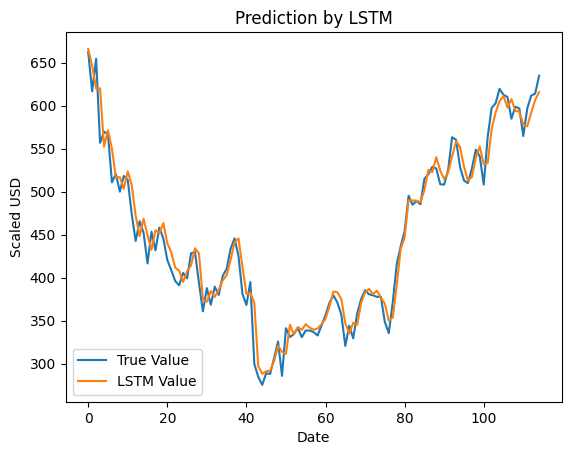

Mean Absolute Error (MAE): 13.816685366423235
Mean Squared Error (MSE): 324.91202599852005
Root Mean Squared Error (RMSE): 18.0253162523857
R-squared (R2) Score: 0.967164565370165


c:\Users\Evelyn\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Filter DataFrame for the desired symbol
ADBE_df = clean_df[clean_df['Ticker'] == 'ADBE']
ADBE_df

# Plot closing prices
ADBE_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for ADBE')
# Show plot
plt.show()

#Set Target Variable
ADBE_output = ADBE_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(ADBE_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=ADBE_df.index)
feature_transform.head()

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = ADBE_output[:len(train_index)].values.ravel(), ADBE_output[len(train_index): (len(train_index)+len(test_index))].values.ravel()


#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


y_pred= lstm.predict(X_test)
y_pred
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


# 1. Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)



COSTCO LSTM

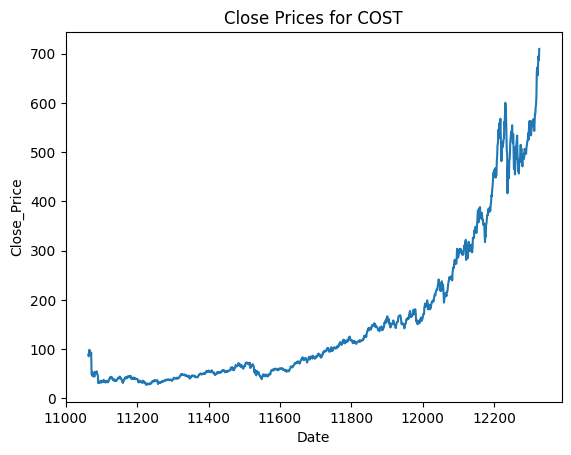

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 23233.3066
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 22929.9883
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 22484.6211
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 21823.3047
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 20925.0664
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 19806.2402
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 18513.4844
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 17110.2246
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 15663.0820
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 14232.1426
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 12865.7100
Epoch 12/100
144/144 [==============================

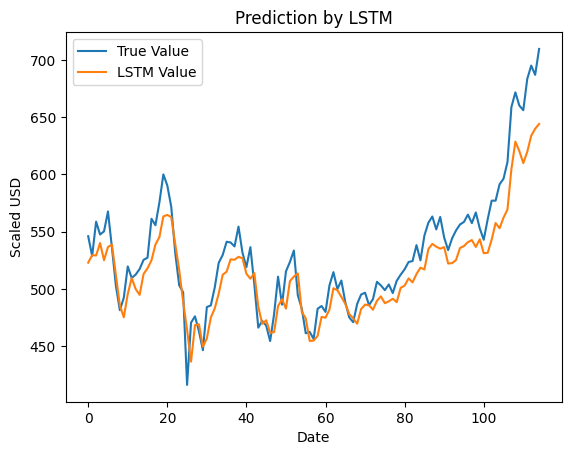

Mean Absolute Error (MAE): 18.97889817212976
Mean Squared Error (MSE): 551.9635008654237
Root Mean Squared Error (RMSE): 23.493903482934115
R-squared (R2) Score: 0.81285633358274


c:\Users\Evelyn\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Filter DataFrame for the desired symbol
COST_df = clean_df[clean_df['Ticker'] == 'COST']
COST_df

# Plot closing prices
COST_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for COST')
# Show plot
plt.show()

#Set Target Variable
output = COST_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(COST_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=COST_df.index)
feature_transform.head()

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()


#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


y_pred= lstm.predict(X_test)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


# 1. Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)




JPM LSTM

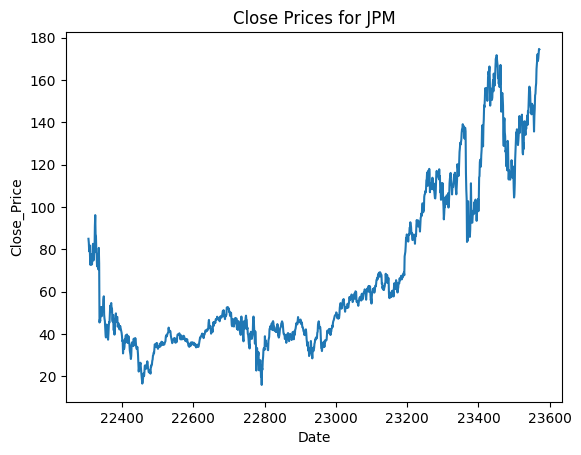

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 4699.9419
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 4496.3706
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 4145.2432
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 3623.9929
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 2980.5081
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 2301.2744
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 1672.9357
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 1155.4227
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 772.6328
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 516.7651
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 360.5925
Epoch 12/100
144/144 [==============================] - 0s 1ms/ste

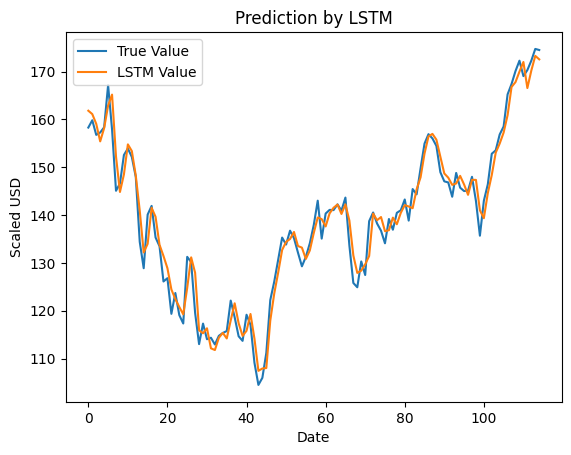

Mean Absolute Error (MAE): 2.4953264850118884
Mean Squared Error (MSE): 9.360472415347358
Root Mean Squared Error (RMSE): 3.059488914074924
R-squared (R2) Score: 0.9657144714633259


c:\Users\Evelyn\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Filter DataFrame for the desired symbol
JPM_df = clean_df[clean_df['Ticker'] == 'JPM']
JPM_df

# Plot closing prices
JPM_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for JPM')
# Show plot
plt.show()

#Set Target Variable
output = JPM_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(JPM_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=JPM_df.index)
feature_transform.head()

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()


#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


y_pred= lstm.predict(X_test)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


# 1. Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)






NVDA LSTM

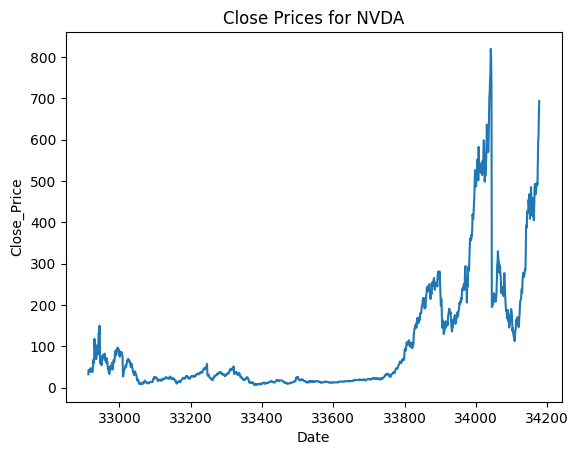

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 23895.7949
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 23750.9863
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 23550.4688
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 23261.0137
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 22869.2012
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 22371.9902
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 21776.3535
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 21097.0703
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 20353.7383
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 19567.8828
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 18760.6543
Epoch 12/100
144/144 [==============================

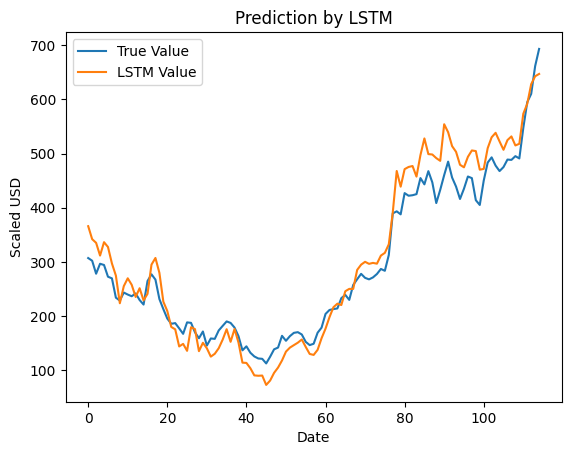

Mean Absolute Error (MAE): 31.370003900942596
Mean Squared Error (MSE): 1372.4745667214934
Root Mean Squared Error (RMSE): 37.04692384964632
R-squared (R2) Score: 0.9276228485486624


c:\Users\Evelyn\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Filter DataFrame for the desired symbol
NVDA_df = clean_df[clean_df['Ticker'] == 'NVDA']
NVDA_df

# Plot closing prices
NVDA_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for NVDA')
# Show plot
plt.show()

#Set Target Variable
output = NVDA_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(NVDA_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=NVDA_df.index)
feature_transform.head()

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()


#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


y_pred= lstm.predict(X_test)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


# 1. Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


